## **Code source**

In [9]:
import math
#L : Liste fiha 2 robots w execution time mteehom, example : [('R10', 95), ('R3', 96)]
#task_position : (x,y)
#alpha beta gamma dmax Tmax : numbers
def best_robot_within_2_conflict(L,task_position,alpha,beta,gamma,d_max,T_max,list_robots,list_battery) : 
  Robot1 = list_robots[L[0][0]]
  Robot2 = list_robots[L[1][0]]
  t1 = L[0][1]
  t2 = L[1][1]
  b1 = list_battery[L[0][0]] 
  b2 = list_battery[L[1][0]]
  u1 = utiliy4(alpha, beta ,gamma,Robot1,task_position,t1,b1,Robot2,task_position,t2,b2,d_max,T_max) # R1 <- A et R2 <- A
  u2 = utiliy4(alpha, beta ,gamma,Robot1,task_position,t1,b1,Robot2,0,t2,b2,d_max,T_max)# R1 <- A et R2 <- repos
  u3 = utiliy4(alpha, beta , gamma,Robot1,0,t1,b1,Robot2,task_position,t2,b2,d_max,T_max) # R1 <- repos et R2 <- A
  u4 = utiliy4(alpha, beta , gamma,Robot1,0,t1,b1,Robot2,0,t2,b2,d_max,T_max) # R1 <- repos et R2 <- repos
  u1 = sum(list(u1))
  u2 = sum(list(u2))
  u3 = sum(list(u3))
  u4 = sum(list(u4))
  a_list = [u1,u2,u3,u4]
  max_value = max(a_list)
  max_index = a_list.index(max_value)
  #Nash
  if max_index == 1 :
    return L[0][0]
  else :
    return L[1][0]

In [8]:
import math
from matplotlib import pyplot as plt
#alpha beta et gamma sont des les dégres de liberté ,leurs sommes = 1
#list_tasks : La liste des tache qui contient les cordonnées (x,y) des taches (Type : dictionnaire, Exemple : list_tasks = {'T1': (80, 38),'T2': (78, 37)} )
#list_robots : La liste des robots qui contient les cordonnées (x,y) des robots (Type : dictionnaire, Exemple : list_robots = {'R1': (10, 20),'R2': (30, 40)} )
#list_battery : La liste des niveaux des batteries des robots (Type : dictionnaire, Exemple : list_battery = {'R1': 35,'R2': 40} ) (Pourcentage)
#list_allocation : L'allocation possible de chaque tache + la durée de chaque tache par chaque robot (Qui peut faire cette tache ? + En combien de temps il peut la faire ?)
# list_allocation (Type : dictionnaire, Exemple : list_allocation = list_allocation = {'T1': [('R10', 95), ('R3', 20)], 'T2': [('R9', 43)]) Explication : T1 peut etre faire par R10 en 95 unités du temps et par R3 en 20 unités du temps

#T_max : Durée d'execution maximale (On la trouve dans list_allocation) Exemple : list_allocation = {'T1': [('R10', 95), ('R3', 20)], 'T2': [('R9', 43)]) => T_max = 95
#d_max : Distance maximale entre un robot et une tache 

def general_func(alpha, beta, gamma,list_tasks,list_battery,list_robots,list_allocation,T_max,d_max) : 
  allocation = {}
  distance_totale = 0
  temps_totale=0 
  consommation_battery = 0
  #Iteration sur les taches
  for i in list_tasks.keys():
    #Si la tache peut etre faite par un seul robot (conflit = 0) => Allocation directe
    if len(list_allocation[i])==1 : 
      allocation[i] = list_allocation[i][0][0]
      temps_totale += list_allocation[i][0][1]
      rob = list_robots[list_allocation[i][0][0]]
      tsk = list_tasks[i]
      distance_parcourue = math.sqrt( (rob[0] - tsk[0])**2 + (rob[1] - tsk[1])**2 )
      distance_totale += distance_parcourue
      list_robots[list_allocation[i][0][0]]  = list_tasks[i]
      list_battery[list_allocation[i][0][0]] =list_battery[list_allocation[i][0][0]] - 5 
     #Sinon :  la tache peut etre faite par 2 ou plusieurs robots (conflit # 0) => Théorie de jeu et calcul d'equilibre
    else : 
      L = list_allocation[i]
      # L c'est liste qui contient les differents robots 
      Robot1 = list_robots[L[0][0]]
      Robot2 = list_robots[L[1][0]]
      t1 = L[0][1]
      t2 = L[1][1]
      task_position = list_tasks[i]
      b1 = list_battery[L[0][0]] 
      b2 = list_battery[L[1][0]]
      n = len(L)
      A = L
      while len(A)> 1 :
        H = [A[0],A[1]]
        R = best_robot_within_2_conflict(H,task_position,alpha,beta,gamma,T_max,d_max,list_robots,list_battery)
        if A[0][0] == R :
          A.pop(1)
        else :
          A.pop(0)
      for index in range(len(L)) : 
        if L[index][0] == R :
          break
      allocation[i] = R
      temps_totale += L[index][1]
      rob = list_robots[R]
      tsk = list_tasks[i]
      distance_parcourue = math.sqrt( (rob[0] - tsk[0])**2 + (rob[1] - tsk[1])**2 )
      distance_totale += distance_parcourue
      list_robots[R]  = list_tasks[i]
      list_battery[R] -=5
  for i in allocation.values() :
    consommation_battery += list_battery[i]
  return (allocation,distance_totale,temps_totale,consommation_battery)

In [3]:
def utiliy4(alpha, beta ,gamma, Robot1,Task1,t1,b1,Robot2,Task2,t2,b2, d_max,Tmax):
  if Task1==0 and  Task2==0 :
    return (0,0)
  if Task1==Task2 :
    return (-1,-1)
  elif Task1==0 :
    distance_robot2_task2 = 4- (beta* math.sqrt( (Robot2[0] - Task2[0])**2 + (Robot2[1] - Task2[1])**2 ))/d_max
    u=distance_robot2_task2-alpha*t2/Tmax + gamma* b2/100 
    return (0,u)
  elif Task2==0 :
    distance_robot1_task1 = 4- ( beta*math.sqrt( (Robot1[0] - Task1[0])**2 + (Robot1[1] - Task1[1])**2 ))/d_max
    u=distance_robot1_task1-alpha*t1/Tmax + gamma*b1/100
    return (u,0)
  else :
    u1 = 4-(beta*math.sqrt( (Robot1[0] - Task1[0])**2 + (Robot1[1] - Task1[1])**2 ))/d_max -alpha*t1/Tmax + gamma* b1/100 
    u2 = 4- (beta*math.sqrt( (Robot2[0] - Task2[0])**2 + (Robot2[1] - Task2[1])**2 ))/d_max -alpha*t2/Tmax + gamma* b2/100
    return (u1,u2)

## **Exemple d'application**

In [ ]:
import numpy as np
d_max = 100
T_max = 100
list_tasks = {'T1': (80.88147193690499, 38),
'T2': (78.10548599619733, 37),
'T3': (56.8176146374026, 70),
'T4': (71.82255047676631, 53),
'T5': (50.57013243716313, 85),
'T6': (8.487020827987346, 44),
'T7': (3.687324876871634, 100),
'T8': (46.036596968210276, 91),
'T9': (51.739543589066464, 63),
'T10': (4.4709542768266335, 66),
'T11': (45.76457021042237, 79),
'T12': (38.777878883708475, 58),
'T13': (69.64960295397435, 87),
'T14': (48.48684975493916, 77),
'T15': (60.1381733683944, 93),
'T16': (96.79707555124712, 100),
'T17': (98.7827657800577, 74),
'T18': (54.044844675854705, 62),
'T19': (68.47999943000718, 73),
'T20': (63.33439774634873, 32),
'T21': (62.74856924245211, 32),
'T22': (66.01759734839521, 7),
'T23': (1.1471855451022805, 52),
'T24': (91.59190748689802, 55),
'T25': (35.93284333519174, 24),
'T26': (20.083137768266024, 3),
'T27': (52.17236559757006, 57),
'T28': (93.27819802845372, 100),
'T29': (67.51522084747941, 68),
'T30': (47.04049877673236, 64),
'T31': (35.02137569578472, 93),
'T32': (10.545883091737485, 45),
'T33': (25.57265259651773, 94),
'T34': (86.60755981495221, 29),
'T35': (22.144407883961147, 44),
'T36': (41.672688192694494, 30),
'T37': (6.099921575386991, 62),
'T38': (15.963149657443354, 42),
'T39': (90.82048384733025, 91),
'T40': (49.55579393454589, 34),
'T41': (32.444862051741865, 32),
'T42': (23.28872500249829, 37),
'T43': (48.80234433062056, 48),
'T44': (78.03931365092028, 43),
'T45': (71.76874711716896, 36),
'T46': (53.314887016819725, 68),
'T47': (82.36458166940965, 66),
'T48': (70.56753954274501, 94),
'T49': (47.56847753653343, 30),
'T50': (55.17533177803523, 67)}

list_robots = {'R1': (37.26191821043129, 3),
'R2': (91.12863440416477, 72),
'R3': (48.99455320431827, 48),
'R4': (70.97440611196498, 99),
'R5': (95.67771224753184, 77),
'R6': (63.32196933581883, 46),
'R7': (55.56998647202327, 100),
'R8': (10.43861187575147, 26),
'R9': (31.445674622001697, 57),
'R10': (56.75671158884044, 20),
'R11': (2.4482597933774275, 80),
'R12': (32.15349849473439, 56),
'R13': (5.184133057595042, 42),
'R14': (19.00093887716302, 86),
'R15': (9.14072554853348, 14)}

list_allocation = {'T1': [('R10', 95), ('R3', 96)],
'T2': [('R9', 43)],
'T3': [('R6', 35)],
'T4': [('R5', 23)],
'T5': [('R3', 0)],
'T6': [('R13', 28), ('R3', 63)],
'T7': [('R12', 100)],
'T8': [('R15', 39), ('R10', 26)],
'T9': [('R10', 80), ('R4', 95)],
'T10': [('R10', 1), ('R10', 39)],
'T11': [('R12', 62), ('R2', 28)],
'T12': [('R6', 18), ('R10', 38)],
'T13': [('R3', 18)],
'T14': [('R5', 74)],
'T15': [('R13', 18)],
'T16': [('R14', 66)],
'T17': [('R8', 70), ('R2', 46)],
'T18': [('R4', 16), ('R2', 64)],
'T19': [('R12', 76), ('R11', 93)],
'T20': [('R3', 46), ('R13', 2)],
'T21': [('R12', 67), ('R9', 61)],
'T22': [('R14', 53)],
'T23': [('R3', 43)],
'T24': [('R2', 94)],
'T25': [('R8', 87), ('R3', 74)],
'T26': [('R7', 31)],
'T27': [('R2', 33)],
'T28': [('R3', 97), ('R3', 73)],
'T29': [('R13', 81), ('R4', 57)],
'T30': [('R13', 66)],
'T31': [('R9', 37)],
'T32': [('R3', 77)],
'T33': [('R2', 23)],
'T34': [('R9', 35), ('R13', 83)],
'T35': [('R2', 89)],
'T36': [('R10', 3)],
'T37': [('R1', 86), ('R3', 11)],
'T38': [('R12', 98), ('R1', 50)],
'T39': [('R7', 6)],
'T40': [('R14', 22), ('R6', 50)],
'T41': [('R7', 90)],
'T42': [('R3', 39)],
'T43': [('R7', 84)],
'T44': [('R3', 98)],
'T45': [('R4', 0)],
'T46': [('R15', 31)],
'T47': [('R15', 18)],
'T48': [('R10', 58)],
'T49': [('R1', 85), ('R3', 75)],
'T50': [('R2', 18), ('R7', 83)]}

list_battery = {'R1': 6,
'R2': 12,
'R3': 33,
'R4': 82,
'R5': 5,
'R6': 85,
'R7': 49,
'R8': 28,
'R9': 69,
'R10': 16,
'R11': 67,
'R12': 23,
'R13': 96,
'R14': 1,
'R15': 67}
general_func(0.33,0.33,0.33,list_tasks,list_battery,list_robots,list_allocation,T_max,d_max)

({'T1': 'R3',
  'T2': 'R9',
  'T3': 'R6',
  'T4': 'R5',
  'T5': 'R3',
  'T6': 'R13',
  'T7': 'R12',
  'T8': 'R15',
  'T9': 'R4',
  'T10': 'R10',
  'T11': 'R2',
  'T12': 'R6',
  'T13': 'R3',
  'T14': 'R5',
  'T15': 'R13',
  'T16': 'R14',
  'T17': 'R2',
  'T18': 'R4',
  'T19': 'R11',
  'T20': 'R13',
  'T21': 'R9',
  'T22': 'R14',
  'T23': 'R3',
  'T24': 'R2',
  'T25': 'R8',
  'T26': 'R7',
  'T27': 'R2',
  'T28': 'R3',
  'T29': 'R4',
  'T30': 'R13',
  'T31': 'R9',
  'T32': 'R3',
  'T33': 'R2',
  'T34': 'R13',
  'T35': 'R2',
  'T36': 'R10',
  'T37': 'R3',
  'T38': 'R1',
  'T39': 'R7',
  'T40': 'R6',
  'T41': 'R7',
  'T42': 'R3',
  'T43': 'R7',
  'T44': 'R3',
  'T45': 'R4',
  'T46': 'R15',
  'T47': 'R15',
  'T48': 'R10',
  'T49': 'R1',
  'T50': 'R7'},
 2407.6098699130216,
 2476,
 1105)

## **Graphes**

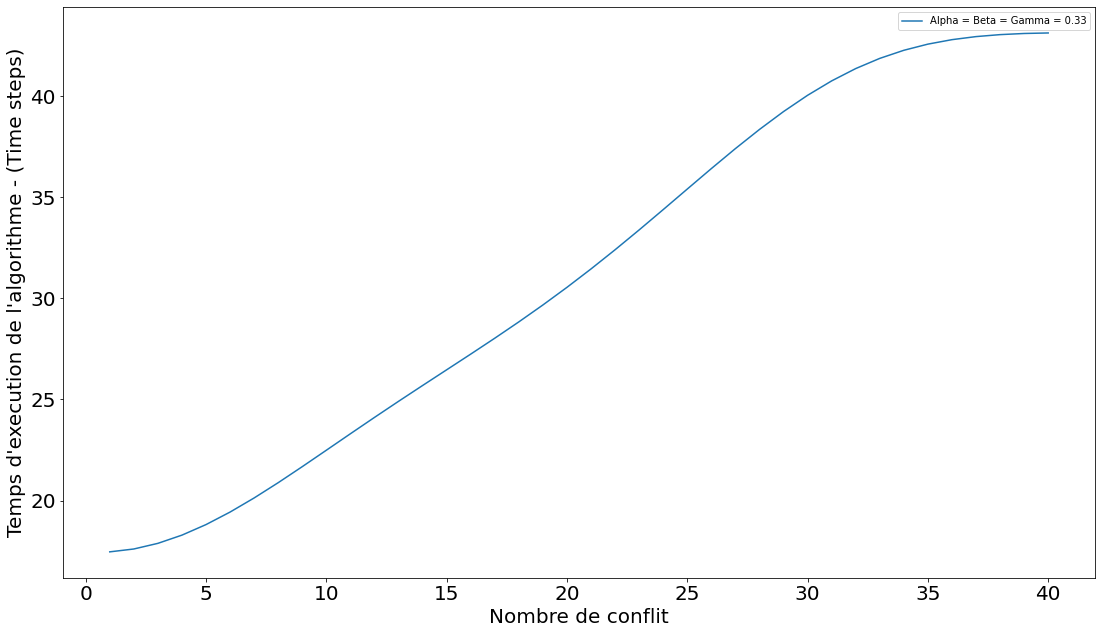

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import copy
import random
x = np.linspace(1,40,40)
T_max = 100
def draw_time(alpha,beta,gamma) :
  for i in range(25):
    n = random.choice([1,2,3,4])
    L = []
    for k in range(n) :
      number = random.randint(1, 15)
      speed = random.randint(1, 50)
      L.append(('R'+str(number),speed))
    list_allocation['T'+str(i+1)] = L

  list_tasks['T1'] = (random.randint(1, 100),random.randint(1, 100))
  for i in range(40) : 
    list_robots['R'+str(i+1)] = (random.randint(1, 100),random.randint(1, 100))
  for i in range(40) : 
    list_battery['R'+str(i+1)] = random.randint(1, 100)

  A = []
  for count in range(50):
    y = []
    for i in range(len(x)) :
      list_tasks_copy = copy.deepcopy(list_tasks)
      list_robots_copy = copy.deepcopy(list_robots)
      list_battery_copy = copy.deepcopy(list_battery)
      list_allocation_copy = copy.deepcopy(list_allocation)
      #list_tasks = {'T1': (80.88147193690499, 38)}
      #list_robots = {'R1': (37.26191821043129, 3)}
      if i >=1 :  
        L = list_allocation["T1"]   
        for k in range(2,i+2) :
          L.append(('R'+str(k),95))
        list_allocation["T1"] = L
      start_time = time.time()
      general_func(alpha,beta,gamma,list_tasks,list_battery,list_robots,list_allocation,T_max,100)
      y.append((time.time() - start_time)*100000)
    A.append(y)

  H = []
  for k in range(len(A[0])):
    mean = 0
    for l in range(50):
      mean+=A[l][k]
    #print(mean/len(A[0]))
    H.append(mean/len(A[0]))
  ysmoothed = gaussian_filter1d(H, sigma=6)
  return ysmoothed

from scipy.ndimage.filters import gaussian_filter1d
#ax = plt.gca()
#ysmoothed = gaussian_filter1d(H, sigma=6)
#plt.plot(x, ysmoothed,'m')


fig = plt.figure()
ax = plt.subplot(111)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
for i in range(1):
    ax.plot(x, draw_time(0.33,0.33,0.33), label='Alpha = Beta = Gamma = 0.33')
ax.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Nombre de conflit',fontsize=20)
plt.ylabel("Temps d'execution de l'algorithme - (Time steps)",fontsize=20)
plt.show()

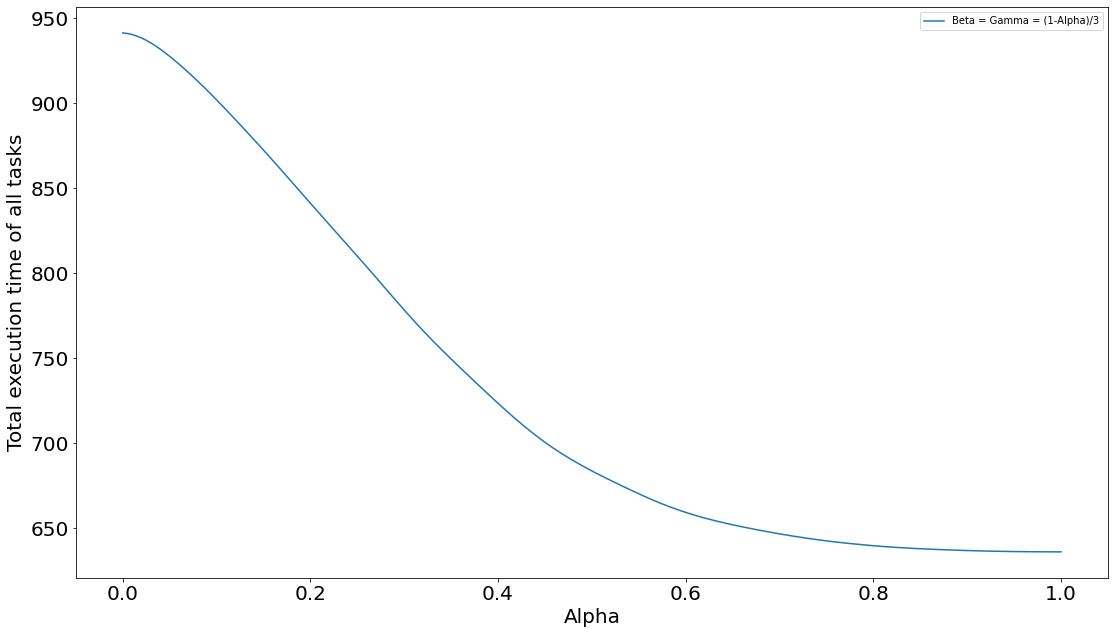

In [ ]:
import numpy as np
import random
from scipy.interpolate import interp1d
x = np.linspace(0.0001,1,200)
def draw_function() :
  y = []
  d_max = 100
  T_max = 100
  list_allocation = {}
  list_robots = {}
  list_tasks = {}
  list_battery = {}
  A = []
  for counter in range(300) :
    for i in range(25):
      n = random.choice([1,2,3,4])
      L = []
      for k in range(n) :
        number = random.randint(1, 15)
        speed = random.randint(1, 50)
        L.append(('R'+str(number),speed))
      list_allocation['T'+str(i+1)] = L

    for i in range(25) : 
      list_tasks['T'+str(i+1)] = (random.randint(1, 100),random.randint(1, 100))
    #print(list_tasks)
    for i in range(15) : 
      list_robots['R'+str(i+1)] = (random.randint(1, 100),random.randint(1, 100))
    for i in range(15) : 
      list_battery['R'+str(i+1)] = random.randint(1, 100)
    y = []
    for alpha in x :
      list_tasks_copy = copy.deepcopy(list_tasks)
      list_robots_copy = copy.deepcopy(list_robots)
      list_battery_copy = copy.deepcopy(list_battery)
      list_allocation_copy = copy.deepcopy(list_allocation)
      beta = (1-alpha)/3
      gamma = (1-alpha)/3
      temps = general_func(alpha,beta,gamma,list_tasks_copy,list_battery_copy,list_robots_copy,list_allocation_copy,T_max,d_max)[2]
      y.append(temps)
    A.append(y)  
  H = []
  for k in range(len(A[0])):
    mean = 0
    for l in range(300):
      mean+=A[l][k]
    #print(mean/len(A[0]))
    H.append(mean/len(A[0]))
  ysmoothed = gaussian_filter1d(H, sigma=6)
  return ysmoothed
from scipy.ndimage.filters import gaussian_filter1d

fig = plt.figure()
ax = plt.subplot(111)

for i in range(1):
  ax.plot(x, draw_function(), label='Beta = Gamma = (1-Alpha)/3')
ax.legend()

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Alpha',fontsize=20)
plt.ylabel("Total execution time of all tasks",fontsize=20)
plt.show()

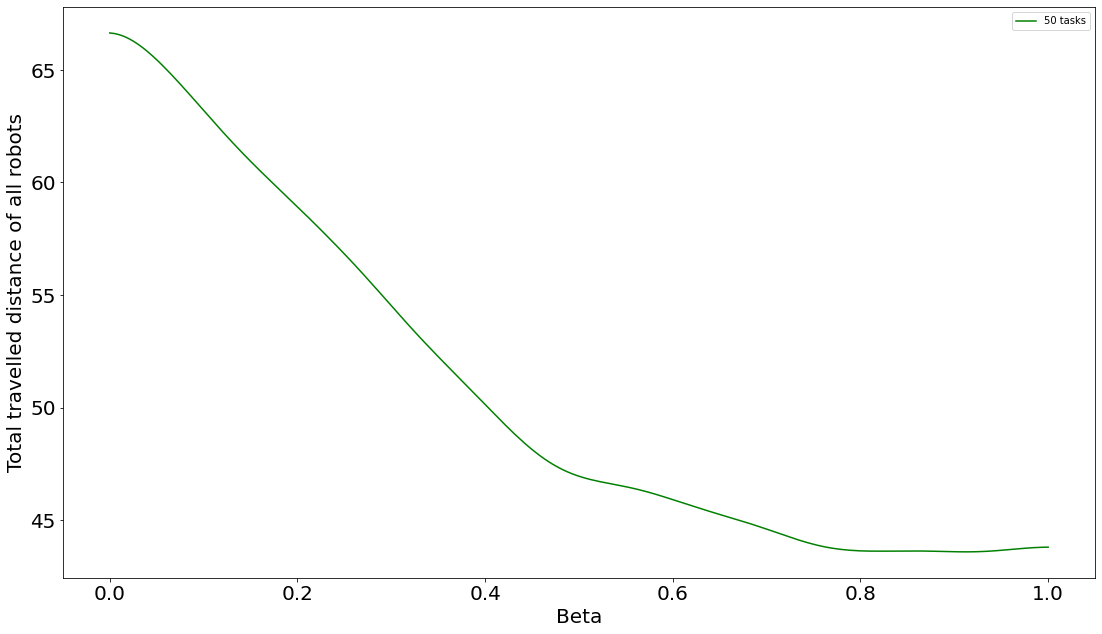

In [10]:
import numpy as np
import random
from scipy.interpolate import interp1d
import copy
x = np.linspace(0.0001,1,200)
def draw_function(n_agents):
  y = []
  d_max = 100
  T_max = 100
  list_allocation = {}
  list_robots = {}
  list_tasks = {}
  list_battery = {}
  A = []
  for counter in range(100) :
    for i in range(n_agents):
      n = random.choice([1,2,3,4,5,6])
      L = []
      for k in range(n) :
        number = random.randint(1, 15)
        speed = random.randint(1, 100)
        L.append(('R'+str(number),speed))
      list_allocation['T'+str(i+1)] = L

    for i in range(n_agents) : 
      list_tasks['T'+str(i+1)] = (random.randint(1, 100),random.randint(1, 100))
    #print(list_tasks)
    for i in range(15) : 
      list_robots['R'+str(i+1)] = (random.randint(1, 100),random.randint(1, 100))
    for i in range(15) : 
      list_battery['R'+str(i+1)] = random.randint(1, 100)
    y = []
    for beta in x :
      list_tasks_copy = copy.deepcopy(list_tasks)
      list_robots_copy = copy.deepcopy(list_robots)
      list_battery_copy = copy.deepcopy(list_battery)
      list_allocation_copy = copy.deepcopy(list_allocation)
      alpha = (1-beta)/3
      gamma = (1-beta)/3
      distance = general_func(alpha,beta,gamma,list_tasks_copy,list_battery_copy,list_robots_copy,list_allocation_copy,T_max,d_max)[1]
      #print(list_tasks_copy==list_tasks)
      #list_tasks_copy = {**list_tasks}
      #list_robots_copy = {**list_robots} 
      #list_battery_copy = {**list_battery} 
      #list_allocation_copy = {**list_allocation}
      y.append(distance)
    A.append(y)  
  H = []
  for k in range(len(A[0])):
    mean = 0
    for l in range(5):
      mean+=A[l][k]
    #print(mean/len(A[0]))
    H.append(mean/len(A[0]))
  ysmoothed = gaussian_filter1d(H, sigma=8)
  return ysmoothed
from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure()
ax = plt.subplot(111)

agents = [50]
colors = ['g','b','r','m','y']
for i in range(1):
  ax.plot(x, draw_function(agents[i]), colors[i], label=str(agents[i])+" tasks")
ax.legend()

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#plt.plot(x, draw_function(),'g')
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Beta',fontsize=20)
plt.ylabel("Total travelled distance of all robots",fontsize=20)
plt.show()

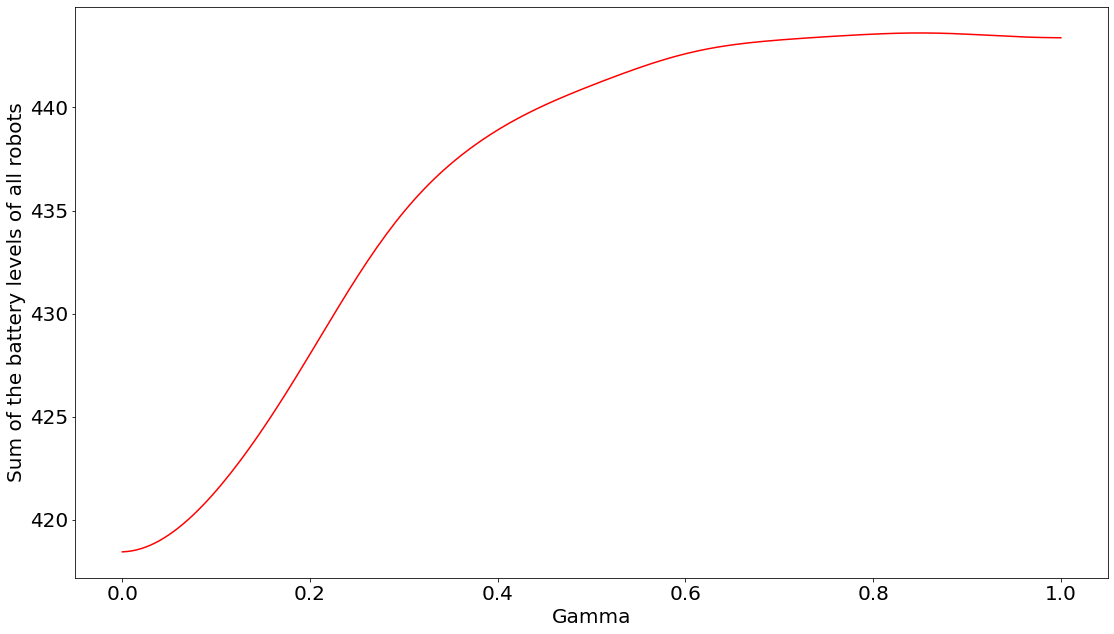

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
x = np.linspace(0.0001,1,200)
y = []
d_max = 100
T_max = 100
list_allocation = {}
list_robots = {}
list_tasks = {}
list_battery = {}
A = []
for counter in range(50) :
  for i in range(25):
    n = random.choice([1,2,3,4])
    L = []
    for k in range(n) :
      number = random.randint(1, 15)
      speed = random.randint(1, 50)
      L.append(('R'+str(number),speed))
    list_allocation['T'+str(i+1)] = L

  for i in range(25) : 
    list_tasks['T'+str(i+1)] = (random.randint(1, 100),random.randint(1, 100))
  #print(list_tasks)
  for i in range(15) : 
    list_robots['R'+str(i+1)] = (random.randint(1, 100),random.randint(1, 100))
  for i in range(15) : 
    list_battery['R'+str(i+1)] = random.randint(60, 100)
  y = []
  for gamma in x :
    list_tasks_copy = copy.deepcopy(list_tasks)
    list_robots_copy = copy.deepcopy(list_robots)
    list_battery_copy = copy.deepcopy(list_battery)
    list_allocation_copy = copy.deepcopy(list_allocation)
    alpha = (1-gamma)/3
    beta = (1-gamma)/3
    battery = general_func(alpha,beta,gamma,list_tasks_copy,list_battery_copy,list_robots_copy,list_allocation_copy,T_max,d_max)[3]
    y.append(battery)
  A.append(y)  
H = []
for k in range(len(A[0])):
  mean = 0
  for l in range(50):
    mean+=A[l][k]
  #print(mean/len(A[0]))
  H.append(mean/len(A[0]))
from scipy.ndimage.filters import gaussian_filter1d
ax = plt.gca()

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ysmoothed = gaussian_filter1d(H, sigma=12)
plt.plot(x, ysmoothed,'r')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Gamma',fontsize=20)
plt.ylabel('Sum of the battery levels of all robots',fontsize=20)
plt.show()